In [120]:
from read_ggp_run import *

In [121]:
paramter_settings = {'mean_lambda': 'bound',
                    'gamma_lambda': 'bound',
                    'var_lambda': 'bound',
                    'mean_q': 'bound',
                    'gamma_q': 'bound',
                    'var_q':'bound',
                    'beta':'bound',
                    'var_x':'bound',
                    'var_g':'bound',
                    'var_dx':'bound',
                    'var_dg':'bound'} 

In [132]:
def plot_true_vs_estim(directory, sample, parameter, param_range, log=True):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(np.linspace(param_range[0], param_range[-1], 100), np.linspace(param_range[0], param_range[-1], 100), ls='--')

    for i, param in enumerate(param_range):
        directory_i = directory.format(i)
        sample_i = sample.format(i)

        filebase = default_filebase(directory_i, sample_i) # default
        minimization_iter_file, minimization_final_file = get_minimization_file(filebase, paramter_settings)

        params_config = read_params_config(minimization_final_file)
        final = get_params_config(params_config, parameter)["final"].values[0]
        # init = get_params_config(params_config, parameter)["init"].values[0]/300.
        ax.scatter(param, final, label= parameter+" = "+str(param), color='tab:blue')
    ax.set_ylabel("estim. "+parameter)
    ax.set_xlabel("'true' "+parameter)
    if log:
        plt.xscale('log')
        plt.yscale('log')

    ax.set_xticks(param_range)
    ax.set_xticklabels([ str(v) for i,v in enumerate(param_range)])

    # plt.legend(loc=(1.05,0))
    plt.show()



def plot_all_params(directory, sample, parameter, param_range, params_config):
    fig, ax = plt.subplots(figsize=(10,6))
    cmap = plt.cm.tab10

    for i, param in enumerate(param_range):
        directory_i = directory.format(i)
        sample_i = sample.format(i)

        filebase = default_filebase(directory_i, sample_i) # default
        minimization_iter_file, minimization_final_file = get_minimization_file(filebase, paramter_settings)
        for j,k in enumerate(paramter_settings.keys()):
            if k != parameter:
                params_config = read_params_config(minimization_final_file)
                final = get_params_config(params_config, k)["final"].values[0]
                init = get_params_config(params_config, k)["init"].values[0]
                if i==0:
                    plt.scatter(param, init/final, color=cmap(j), label=k)
                else: 
                    plt.scatter(param, init/final, color=cmap(j))

    plt.xscale('log')

    ax.set_xticks(param_range)
    ax.set_xticklabels([ str(v) for i,v in enumerate(param_range)])
    ax.set_ylabel("'true'/estim.")
    ax.set_xlabel(parameter)
    ax.axhline(1, ls='--', color='tab:blue')

    plt.legend(loc=(1.05,0))
    plt.show()



def plot_param_against_second(directory, sample, x_param, x_param_range, y_param, true_y, params_config):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot([x_param_range[0], x_param_range[-1]], [true_y,true_y], ls='--')

    for i, x in enumerate(x_param_range):
        directory_i = directory.format(i)
        sample_i = sample.format(i)

        filebase = default_filebase(directory_i, sample_i) # default
        minimization_iter_file, minimization_final_file = get_minimization_file(filebase, paramter_settings)

        params_config = read_params_config(minimization_final_file)
        final = get_params_config(params_config, y_param)["final"].values[0]
        ax.scatter(x, final, label=x_param+ ' = ' +str(x), color='tab:blue')

    ax.set_ylabel("estim. "+y_param)
    ax.set_xlabel(x_param)

    plt.xscale('log')
    ax.set_xticks(x_param_range)
    ax.set_xticklabels([ str(v) for i,v in enumerate(x_param_range)])
    # plt.legend(loc=(1.05,0))
    plt.show()


## Vary var_dg

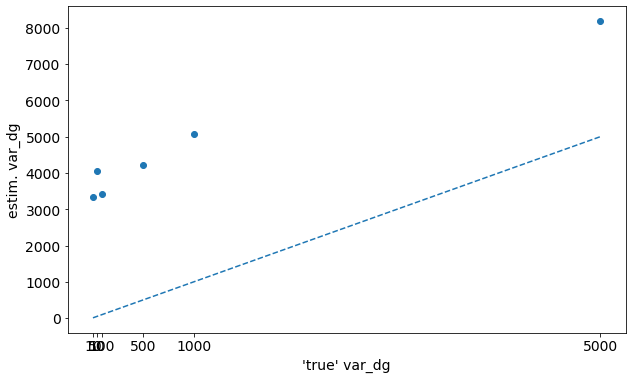

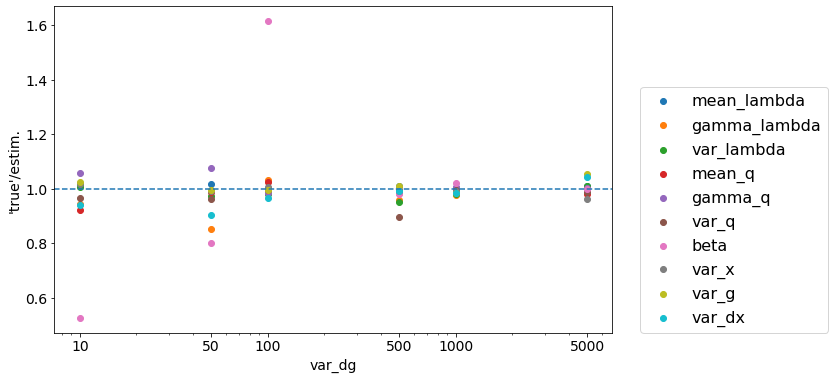

In [133]:
plot_true_vs_estim('../data/var_dg/var_dg_{:d}', 'var_dg_{:d}', "var_dg", [10, 50, 100, 500, 1000, 5000], log=False)
plot_all_params('../data/var_dg/var_dg_{:d}', 'var_dg_{:d}', "var_dg", [10, 50, 100, 500, 1000, 5000], params_config)

## Vary var_dx

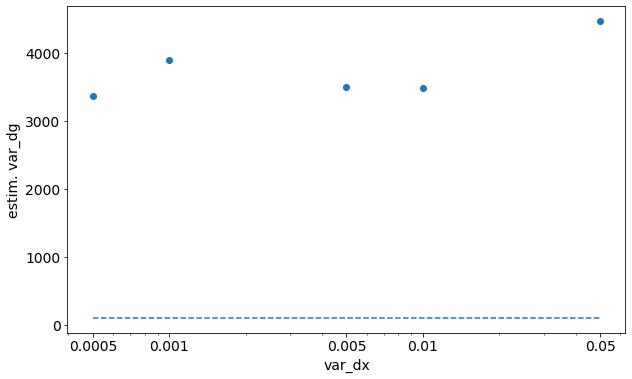

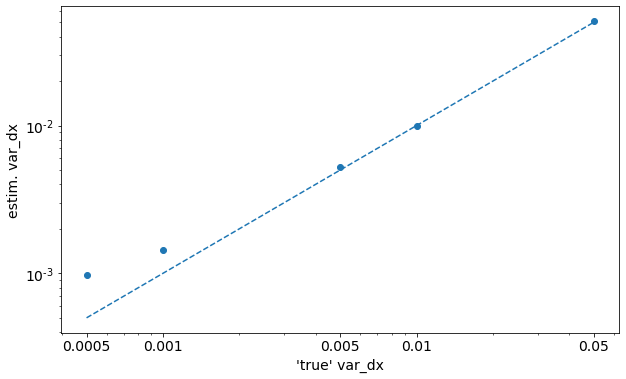

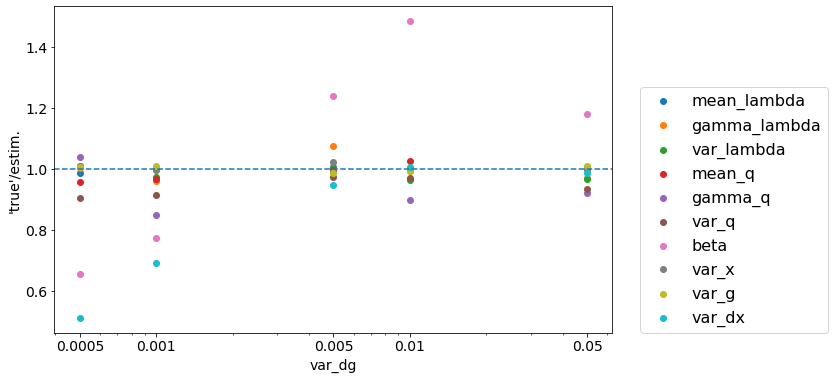

In [131]:
plot_param_against_second('../data/var_dx/var_dx_{:d}', 'var_dx_{:d}', "var_dx", 
                            [0.0005, 0.001, 0.005 , 0.01, 0.05], "var_dg", 100, params_config)
plot_true_vs_estim('../data/var_dx/var_dx_{:d}', 'var_dx_{:d}', "var_dx", [0.0005, 0.001, 0.005 , 0.01, 0.05])

plot_all_params('../data/var_dx/var_dx_{:d}', 'var_dx_{:d}', "var_dg", [0.0005, 0.001, 0.005 , 0.01, 0.05], params_config)

## Vary var_g

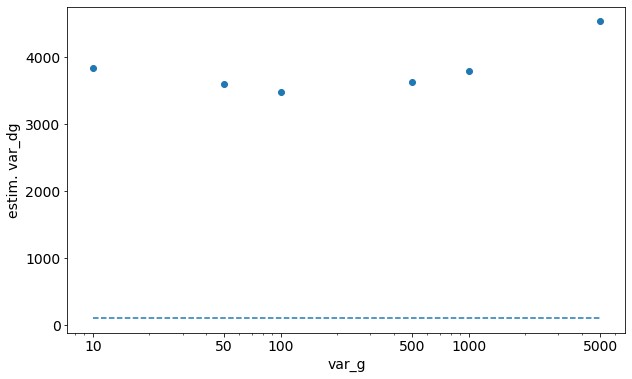

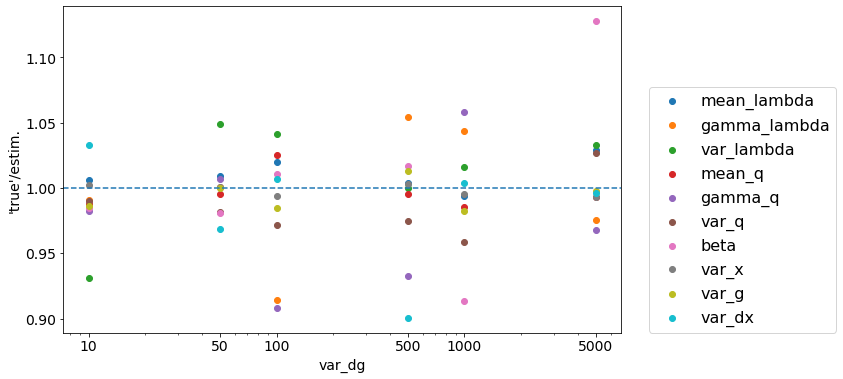

In [125]:

plot_param_against_second('../data/var_g/var_g_{:d}', 'var_g_{:d}', "var_g", 
                            [10, 50, 100, 500, 1000, 5000], "var_dg", 100, params_config)
plot_all_params('../data/var_g/var_g_{:d}', 'var_g_{:d}', "var_dg",[10, 50, 100, 500, 1000, 5000], params_config)


## Vary dt

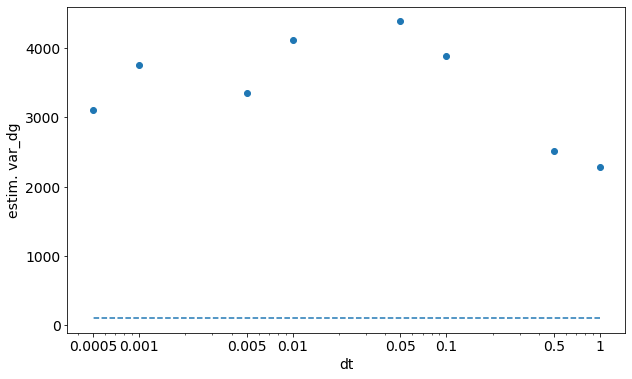

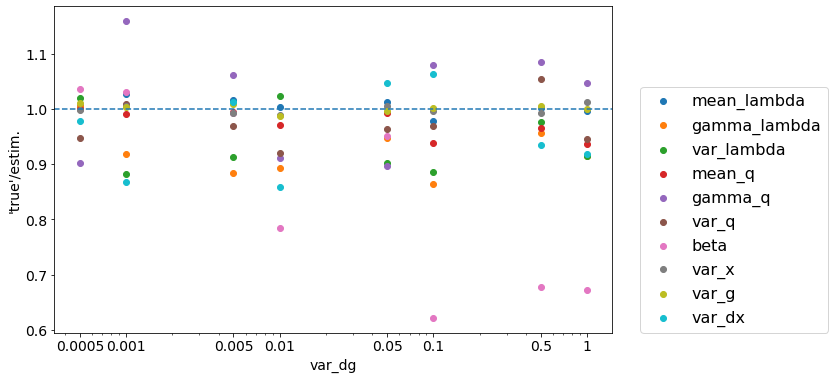

In [126]:
plot_param_against_second('../data/dt/dt_{:d}', 'dt_{:d}', "dt", 
                            [1, 0.5, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4], "var_dg", 100, params_config)
plot_all_params('../data/dt/dt_{:d}', 'dt_{:d}', "var_dg", [1, 0.5, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4], params_config)


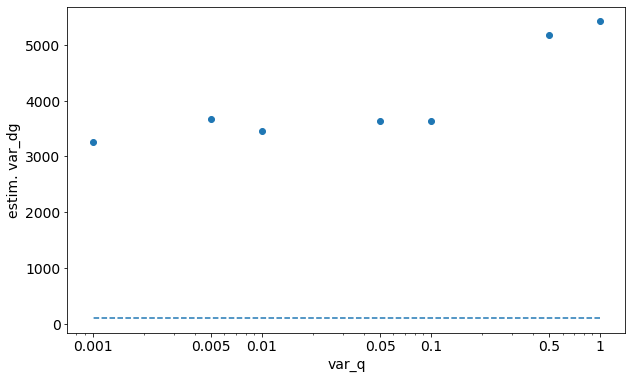

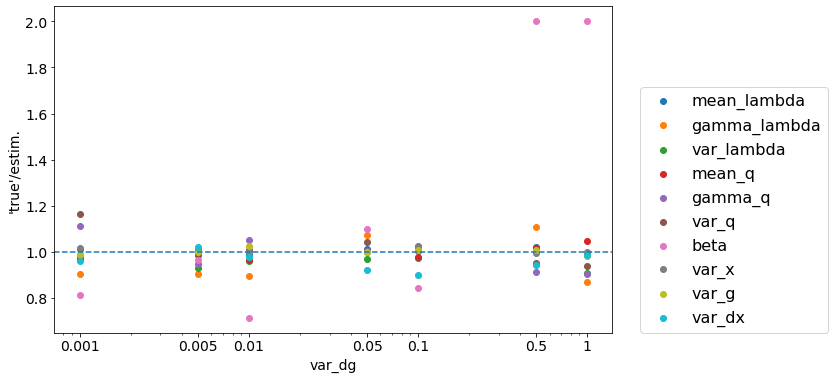

In [139]:

plot_param_against_second('../data/var_q/var_q_{:d}', 'var_q_{:d}', "var_q", 
                            [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3], "var_dg", 100, params_config)
plot_all_params('../data/var_q/var_q_{:d}', 'var_q_{:d}', "var_dg", [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3], params_config)


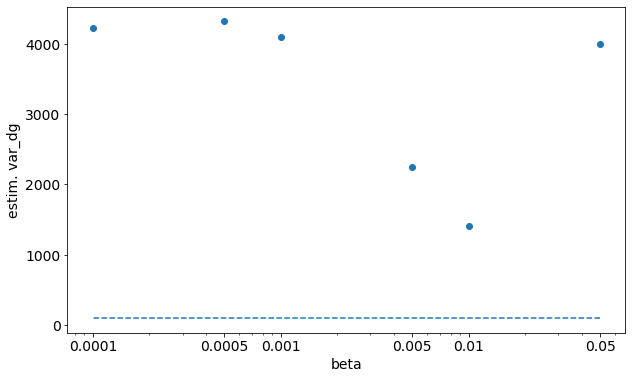

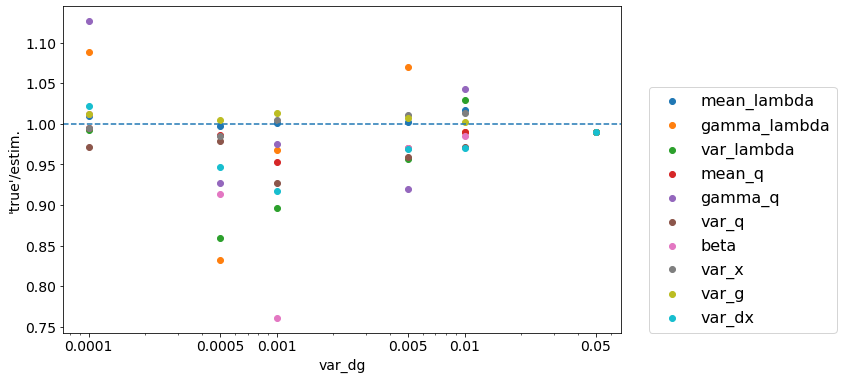

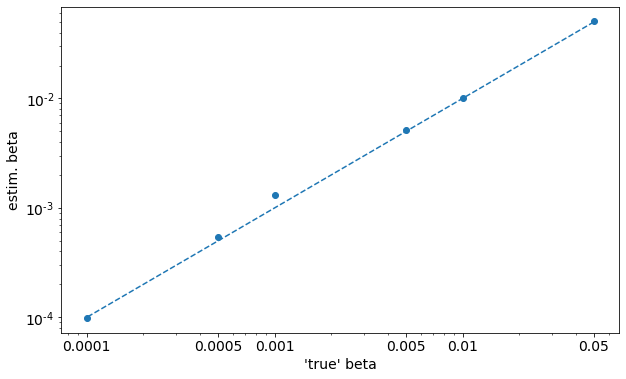

In [143]:
plot_param_against_second('../data/beta/beta_{:d}', 'beta_{:d}', "beta", 
                            [5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4], "var_dg", 100, params_config)
plot_all_params('../data/beta/beta_{:d}', 'beta_{:d}', "var_dg", [5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4], params_config)
plot_true_vs_estim('../data/beta/beta_{:d}', 'beta_{:d}', "beta", [5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4], log=True)
